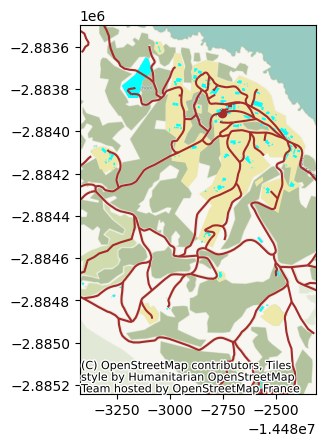

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

map1 = gpd.read_file('adamstown2/landuse.geojson')
map2 = gpd.read_file('adamstown2/roads.geojson')
map3 = gpd.read_file('adamstown2/buildings.geojson')
map1 = map1.to_crs(epsg = 3857)
map2 = map2.to_crs(epsg = 3857)
map3 = map3.to_crs(epsg = 3857)


ax = map1.plot(color = 'palegoldenrod') 
ctx.add_basemap(ax)
map2.plot(ax = ax, color = 'brown')
map3.plot(ax=ax, color = 'cyan')
# map2.plot()
plt.show()

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
# def no_popup(feature):
#     return None

map1 = gpd.read_file('adamstown2/landuse.geojson')
map2 = gpd.read_file('adamstown2/buildings.geojson')
map3 = gpd.read_file('adamstown2/roads.geojson')

map1_center = map1.centroid[0]
map1_location = [map1_center.y, map1_center.x]

map = folium.Map(location=map1_location, zoom_start=12)

# folium.GeoJson(map1.geometry).add_to(map)
folium.GeoJson(map2.geometry, name = 'buildings').add_to(map)
folium.GeoJson(map3.geometry, name = 'roads', 
               opacity = 0.7,
               color='lightcoral').add_to(map)
# folium.GeoJson(map3.geometry, name='roads', popup=None, tooltip=None,
#                style_function=lambda x: {
#                    'color': 'lightcoral',
#                    'popup': ''  # Ensure that no popups are generated
#                }).add_to(map)


folium.LayerControl().add_to(map)
display(map)


C:\Users\Naseeba Rehman\AppData\Local\Temp\ipykernel_35476\2258857298.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map1_center = map1.centroid[0]


Final code v1:

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium


map1 = gpd.read_file('adamstown2/landuse.geojson')
map2 = gpd.read_file('adamstown2/buildings.geojson')
map3 = gpd.read_file('adamstown2/roads.geojson')

map1_center = map1.centroid[0]
map1_location = [map1_center.y, map1_center.x]

map = folium.Map(location=map1_location, zoom_start=12)

folium.GeoJson(map2.geometry, name = 'buildings').add_to(map)
folium.GeoJson(map3.geometry, name = 'roads', 
               opacity = 0.7,
               color='lightcoral').add_to(map)

folium.LayerControl().add_to(map)
display(map)


C:\Users\Naseeba Rehman\AppData\Local\Temp\ipykernel_35476\4128915659.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map1_center = map1.centroid[0]


removing point data to remove markups

In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium


map1 = gpd.read_file('adamstown2/landuse.geojson')
map2 = gpd.read_file('adamstown2/buildings.geojson')
map3 = gpd.read_file('adamstown2/roads.geojson')

# Create new GeoDataFrames for map2 and map3

map3_g = gpd.GeoDataFrame()
map3_g['geometry'] = map3.geometry

# Remove rows that contain point geometries in map2_g and map3_g
# map2_g = map2_g[~map2_g.geometry.type.isin(['Point'])]
map3_g = map3_g[~map3_g.geometry.type.isin(['Point'])]

map1_center = map1.centroid[0]
map1_location = [map1_center.y, map1_center.x]

map = folium.Map(location=map1_location, zoom_start=14)

folium.GeoJson(map2.geometry, name = 'buildings').add_to(map)
folium.GeoJson(map3_g.geometry, name = 'roads', 
               opacity = 0.7,
               color='lightcoral').add_to(map)

folium.LayerControl().add_to(map)
display(map)


C:\Users\Naseeba Rehman\AppData\Local\Temp\ipykernel_35476\1946852729.py:13: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  map3_g['geometry'] = map3.geometry
C:\Users\Naseeba Rehman\AppData\Local\Temp\ipykernel_35476\1946852729.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map1_center = map1.centroid[0]


center map

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium


map1 = gpd.read_file('adamstown2/landuse.geojson')
map2 = gpd.read_file('adamstown2/buildings.geojson')
map3 = gpd.read_file('adamstown2/roads.geojson')

# Create new GeoDataFrames for map3
map3_g = gpd.GeoDataFrame()
map3_g['geometry'] = map3.geometry
map3_g = map3_g[~map3_g.geometry.type.isin(['Point'])]

lat, lng = -25.06992321107777, -130.10593367045323
map1_location = [lat, lng]

map = folium.Map(location=map1_location, zoom_start=14)

folium.GeoJson(map2.geometry, name = 'buildings').add_to(map)
folium.GeoJson(map3_g.geometry, name = 'roads', 
               opacity = 0.7,
               color='lightcoral').add_to(map)

folium.LayerControl().add_to(map)
display(map)


C:\Users\Naseeba Rehman\AppData\Local\Temp\ipykernel_35476\3792688794.py:12: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  map3_g['geometry'] = map3.geometry
